In [1]:
import torch

# Path to the latent variables file
#latent_file = "../examples/torus/Run_w_con_loss_one_variable_usual/LatentCodes/2000.pth"
latent_file = "../examples/torus/Run_w_con_loss_one_variable_usual/LatentCodes/2000.pth"

# Load the latent variables
latent_data = torch.load(latent_file)  # Shape: (num_shapes, latent_size)

In [3]:
# Inspect the keys
print(f"Keys in the loaded file: {latent_data.keys()}")

# Extract latent variables
latent_vectors = latent_data['latent_codes']  # Use the key 'latent_codes'

# Extract latent codes from the OrderedDict
latent_list = list(latent_vectors.values())  # Get the values (list of tensors)

# Combine the list into a single tensor
latent_tensor = torch.stack(latent_list)  # Shape: (num_shapes, latent_size)

print(f"Converted latent variables to tensor with shape: {latent_tensor.shape}")

Keys in the loaded file: dict_keys(['epoch', 'latent_codes'])
Converted latent variables to tensor with shape: torch.Size([1, 369, 16])


In [4]:
epoch = latent_data['epoch']
print(f"Model was saved at epoch: {epoch}")

Model was saved at epoch: 2000


In [5]:
latent_tensor = latent_tensor.squeeze(0)  # Remove the batch dimension
print(f"Latent variables shape after squeezing: {latent_tensor.shape}")

Latent variables shape after squeezing: torch.Size([369, 16])


In [8]:
latent_min = torch.min(latent_tensor, dim=0).values
latent_max = torch.max(latent_tensor, dim=0).values

print("Minimum values for each latent variable:", latent_min)
print("Maximum values for each latent variable:", latent_max)

Minimum values for each latent variable: tensor([-0.9463, -0.3559, -0.4124, -0.3832, -0.3595, -0.3701, -0.4019, -0.3871,
        -0.3607, -0.4348, -0.3426, -0.3982, -0.3609, -0.3331, -0.3467, -0.3319])
Maximum values for each latent variable: tensor([0.9541, 0.3593, 0.4791, 0.3345, 0.3783, 0.3499, 0.3439, 0.3405, 0.4460,
        0.3700, 0.3684, 0.3713, 0.4055, 0.3774, 0.3910, 0.3954])


In [9]:
latent_mean = torch.mean(latent_tensor, dim=0)
latent_std = torch.std(latent_tensor, dim=0)

print("Mean for each latent variable:", latent_mean)
print("Standard deviation for each latent variable:", latent_std)

Mean for each latent variable: tensor([-3.4982e-02, -9.7412e-03,  9.6496e-03,  7.5273e-03, -7.8772e-04,
         1.7067e-02, -4.7310e-05, -4.2501e-03,  1.4474e-02,  1.0957e-02,
        -6.4704e-03,  2.5002e-03,  1.0792e-03,  1.4406e-03, -4.1000e-03,
        -2.0551e-02])
Standard deviation for each latent variable: tensor([0.8442, 0.1372, 0.1355, 0.1387, 0.1381, 0.1405, 0.1346, 0.1403, 0.1356,
        0.1441, 0.1362, 0.1428, 0.1400, 0.1360, 0.1387, 0.1341])


In [7]:
import matplotlib.pyplot as plt

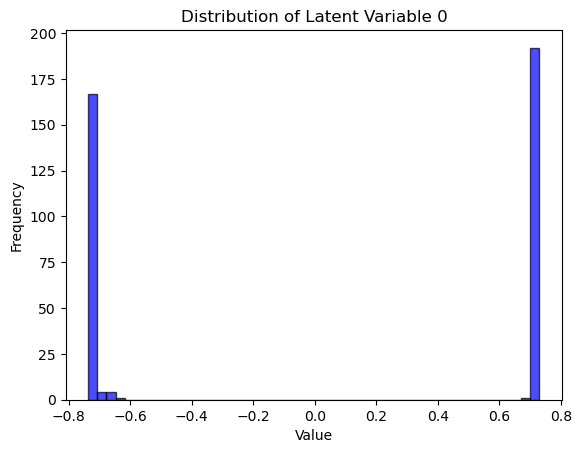

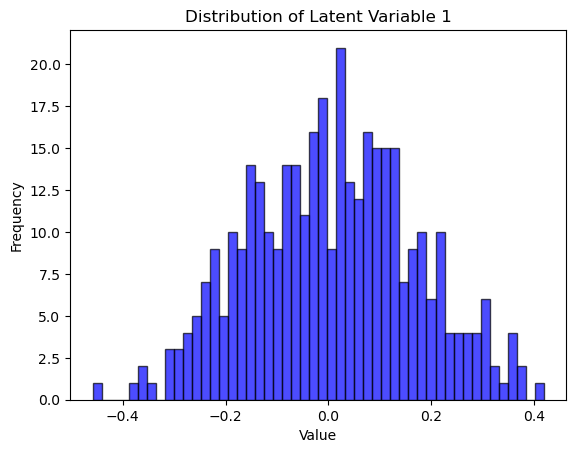

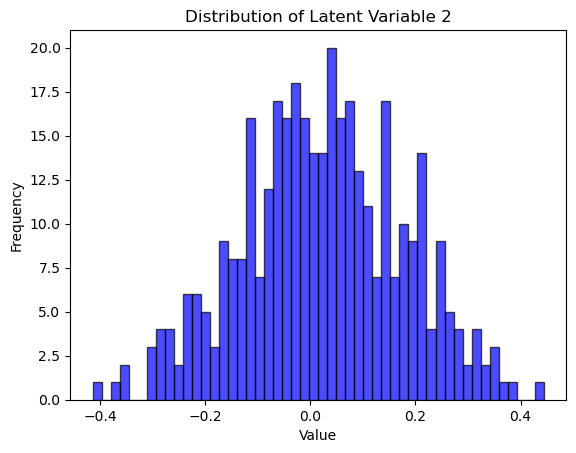

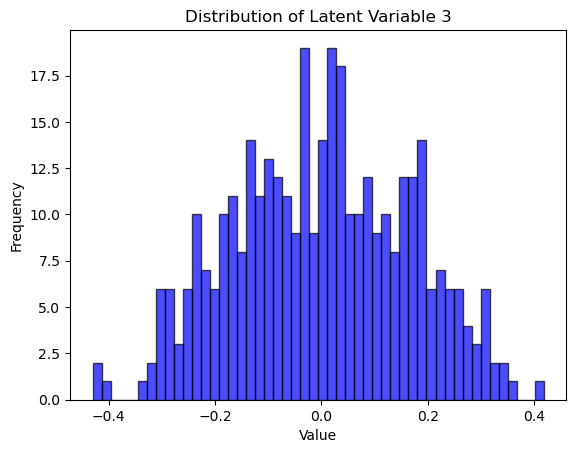

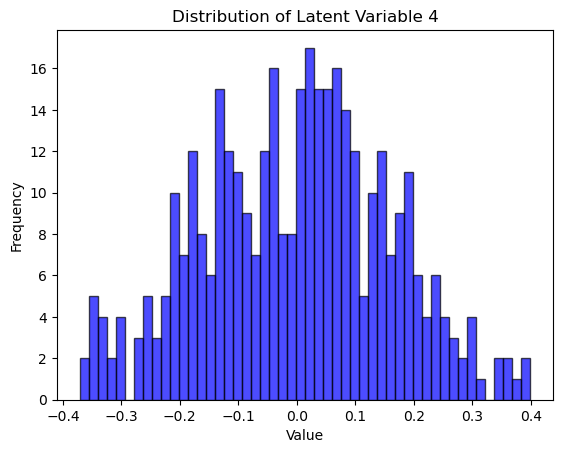

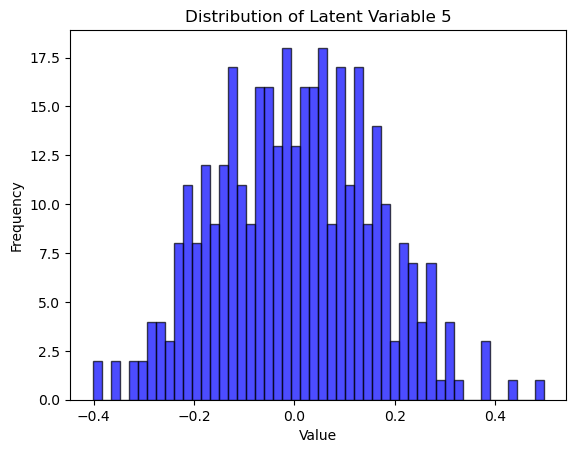

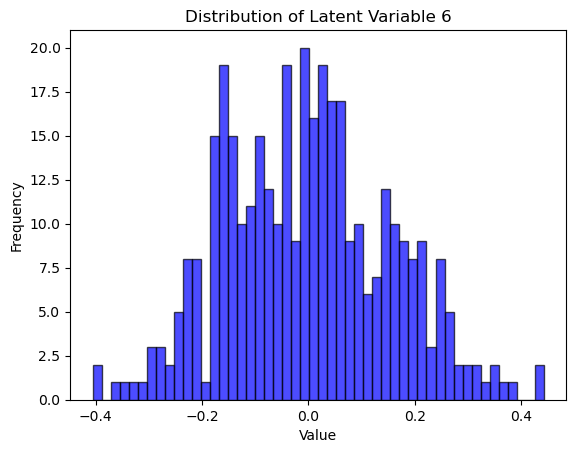

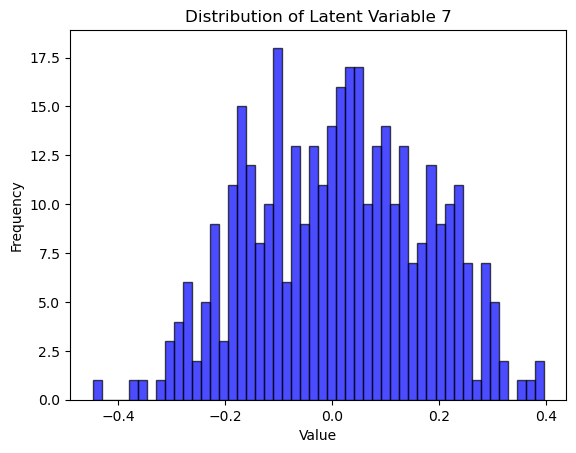

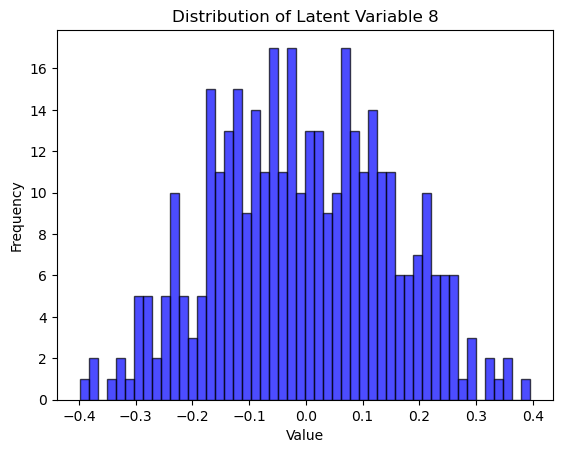

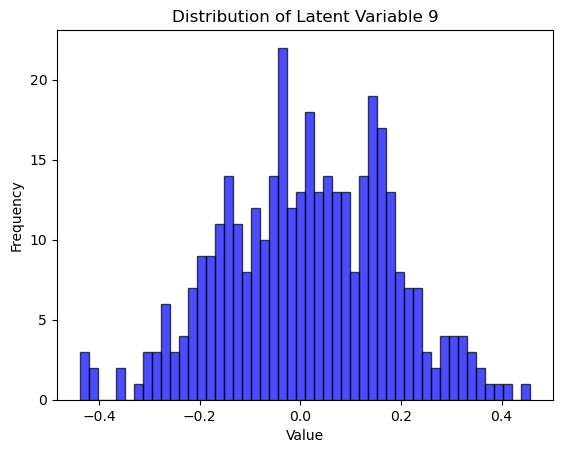

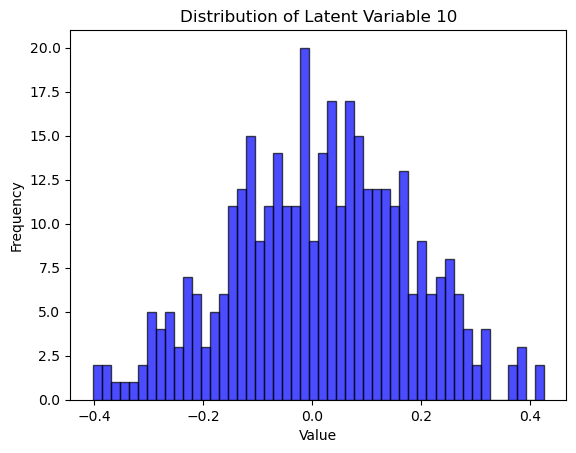

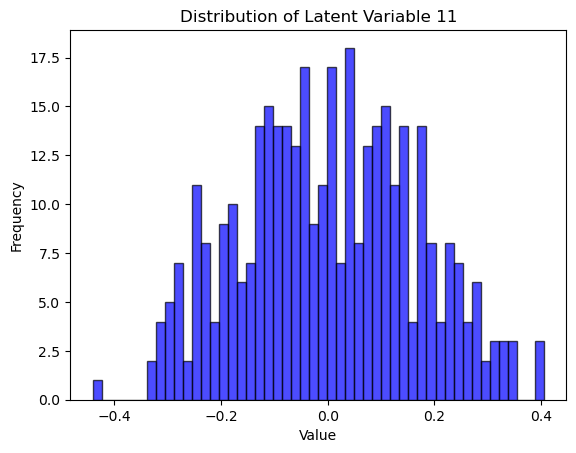

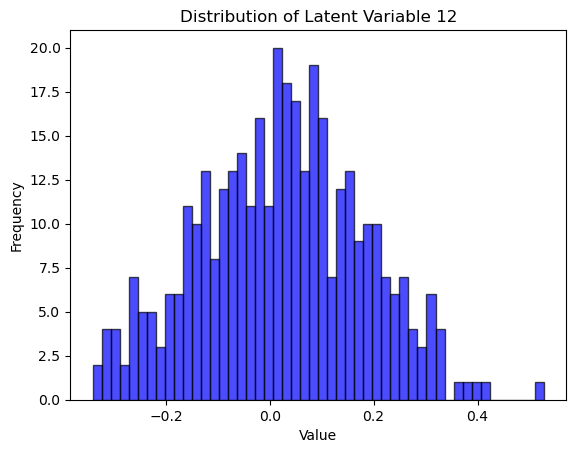

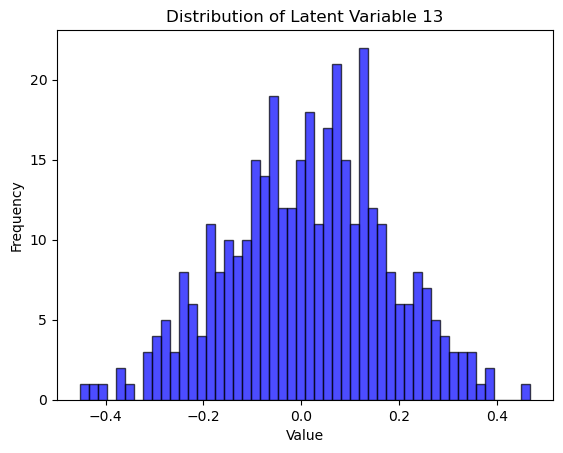

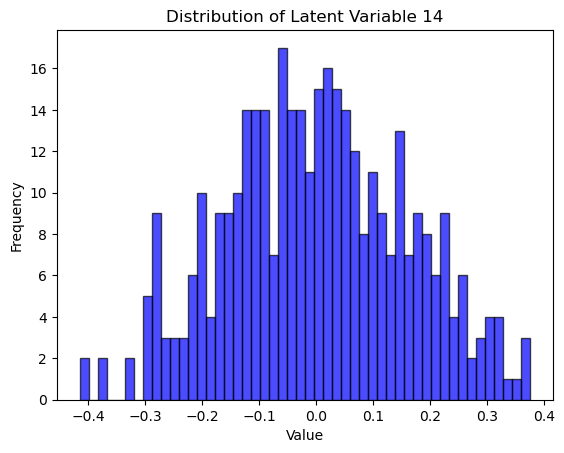

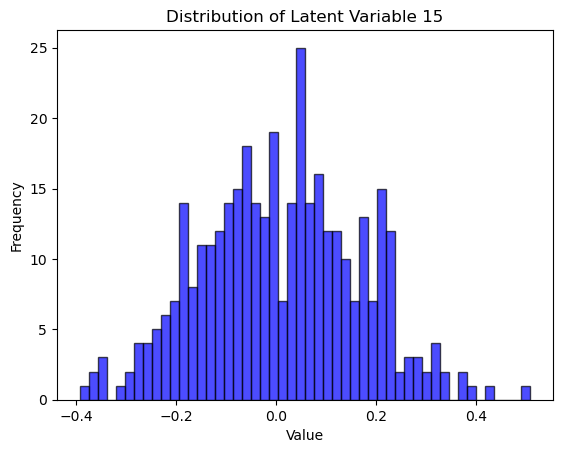

In [8]:
latent_numpy = latent_tensor.cpu().numpy()  # Convert to NumPy for plotting

# Loop over each latent variable and display the plot
for i in range(latent_numpy.shape[1]):
    plt.figure()
    plt.hist(latent_numpy[:, i], bins=50, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Distribution of Latent Variable {i}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    
    # Show the plot inline in the notebook
    plt.show()

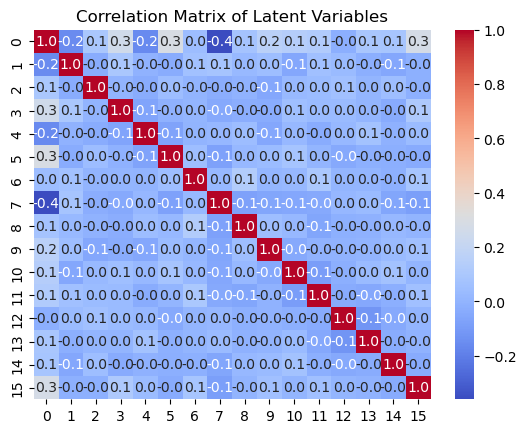

In [9]:
import numpy as np
import seaborn as sns

# Compute the correlation matrix
corr_matrix = np.corrcoef(latent_numpy, rowvar=False)

# Plot the heatmap for visual inspection
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix of Latent Variables")
plt.show()
